# Predicting Bonuses by Regressing on Salaries

## Importing modules

In [70]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline

## Defining colours

In [71]:
train_color = "b"
test_color = "r"

## Preparing data

In [72]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

In [73]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

In [74]:
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualization:

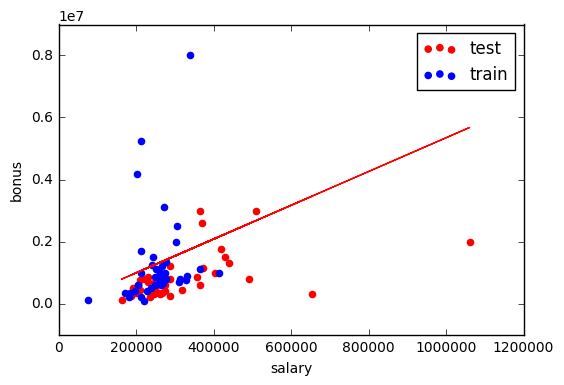

In [75]:
### draw the scatterplot, with color-coded training and testing points
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test), color ="r" )
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

Brrr... Looks pretty bad. Let's look at the numbers:

In [76]:
print reg.coef_
print reg.intercept_

[ 5.44814029]
-102360.543294


And the evaluation:

In [77]:
help(reg.score)

Help on method score in module sklearn.base:

score(self, X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the regression
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score :

In [78]:
reg.score(feature_train, target_train)

0.045509192699524359

In [79]:
reg.score(feature_test, target_test)

-1.4849924173685105

A negative score means, that the model is doing worse than just taking the average!

## Regressing bonus against long_term_incentive

In [80]:
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

In [81]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

In [82]:
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

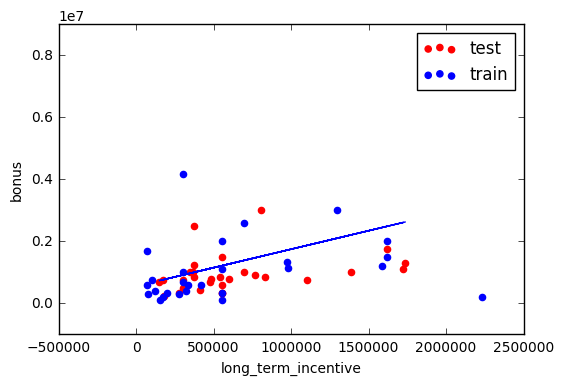

In [83]:
### draw the scatterplot, with color-coded training and testing points
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [84]:
print reg.score(feature_train, target_train)
print reg.score(feature_test, target_test)

0.217085971258
-0.59271289995


### Problems with outliers

In [85]:
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

In [86]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

In [87]:
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
reg2 = linear_model.LinearRegression()
reg2.fit(feature_test, target_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

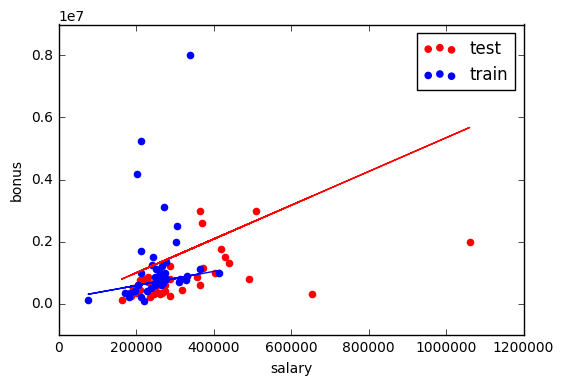

In [89]:
### draw the scatterplot, with color-coded training and testing points
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test), color=test_color )
except NameError:
    pass

try:
    plt.plot( feature_train, reg2.predict(feature_train), color=train_color )
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

If one trains on the test data (blue line) and then looks at the description of the train data, it works a lot better. The reason are the outliers in the train data.

### Slope of the new regression line

In [91]:
print reg2.coef_[0]

2.27410114127
